<h3>In our exercises we aim to explore the contextual relevance of our work at a bit more depth. The lectures are full of basic examples, but we really learn to code by - you guessed it - writing code!</h3>

We are going to combine some of the basic techniques we have learned and at the same time explore some libraries that get us up to speed <b>quickly</b> and <b>efficiently</b>. Let's get started.

<h1> Activity 1 </h1>

<h3>To lemmatize or stem? It's a good question!</h3>

lemmatize is good for finding a (meaningful) word that is synonymous <b>and</b> has meaning
stemming is similar, but will find the root of the word. It also might come up with nonsense words as 'roots' do not need to be meaningful.

These techniques might come in useful if you have words of a similar 'ilk' and do not care to distinguish between them. The libraries will allow you to identify words in context so for example variations of a word may be verbs, adjectives, nouns etc.

Try out a few variations of words e.g. dancer, dancing, dances etc and see if you can identify a pattern. Word categorisation is harder than it looks! Even when the words are very similar. Let's explore the two main approaches.

In [2]:
!pip install nltk

In [9]:
# example 1

# We start with the word dance and try to find variations of the word 'root' or 'origin'.
# Try Dances, Dancing, Dancer etc. See how many combinations of words you can find that share the root.

import nltk
from nltk.stem import PorterStemmer
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\johan\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [4]:
word = 'Dance'

porter = PorterStemmer()
print("Stemmed word: " + porter.stem(word))


Stemmed word: danc


In [23]:
text = """AI models reflect, and often exaggerate, existing gender biases from the real world. It is important to quantify such biases present in models in order to properly address and mitigate them.

In this article, I showcase a small selection of important work done (and currently being done) to uncover, evaluate, and measure different aspects of gender bias in AI models. I also discuss the implications of this work and highlight a few gaps I’ve noticed.

But What Even Is Bias?
All of these terms (“AI”, “gender”, and “bias”) can be somewhat overused and ambiguous. “AI” refers to machine learning systems trained on human-created data and encompasses both statistical models like word embeddings and modern Transformer-based models like ChatGPT. “Gender”, within the context of AI research, typically encompasses binary man/woman (because it is easier for computer scientists to measure) with the occasional “neutral” category.

Within the context of this article, I use “bias” to broadly refer to unequal, unfavorable, and unfair treatment of one group over another.

There are many different ways to categorize, define, and quantify bias, stereotypes, and harms, but this is outside the scope of this article. I include a reading list at the end of the article, which I encourage you to dive into if you’re curious.

A Short History of Studying Gender Bias in AI
Here, I cover a very small sample of papers I’ve found influential studying gender bias in AI. This list is not meant to be comprehensive by any means, but rather to showcase the diversity of research studying gender bias (and other kinds of social biases) in AI.

Man is to Computer Programmer as Woman is to Homemaker? Debiasing Word Embeddings (Bolukbasi et al., 2016)
Short Summary: Gender bias exists in word embeddings (numerical vectors which represent text data) as a result of biases in the training data.
Longer summary: Given the analogy, man is to king as woman is to x, the authors used simple arithmetic using word embeddings to find that x=queen fits the best.


Subtracting the vector representations for “man” from “woman” results in a similar value as subtracting the vector representations for “king” and “queen”. From Man is to Computer Programmer as Woman is to Homemaker? Debiasing Word Embeddings.
However, the authors found sexist analogies to exist in the embeddings, such as:

He is to carpentry as she is to sewing
Father is to doctor as mother is to nurse
Man is to computer programmer as woman is to homemaker

Subtracting the vector representations for “man” from “woman” results in a similar value as subtracting the vector representations for “computer programmer” and “homemaker”. From Man is to Computer Programmer as Woman is to Homemaker? Debiasing Word Embeddings.
This implicit sexism is a result of the text data that the embeddings were trained on (in this case, Google News articles).


Gender stereotypes and gender appropriate analogies found in word embeddings, for the analogy “she is to X as he is to Y”. From Man is to Computer Programmer as Woman is to Homemaker? Debiasing Word Embeddings.
Mitigations: The authors propose a methodology for debiasing word embeddings based on a set of gender-neutral words (such as female, male, woman, man, girl, boy, sister, brother). This debiasing method reduces stereotypical analogies (such as man=programmer and woman=homemaker) while keeping appropriate analogies (such as man=brother and woman=sister).

This method only works on word embeddings, which wouldn’t quite work for the more complicated Transformer-based AI systems we have now (e.g. LLMs like ChatGPT). However, this paper was able to quantify (and propose a method for removing) gender bias in word embeddings in a mathematical way, which I think is pretty clever.

Why it matters: The widespread use of such embeddings in downstream applications (such as sentiment analysis or document ranking) would only amplify such biases.

Gender Shades: Intersectional Accuracy Disparities in Commercial Gender Classification [Buolamwini and Gebru, 2018]
Short summary: Intersectional gender-and-racial biases exist in facial recognition systems, which can classify certain demographic groups (e.g. darker-skinned females) with much lower accuracy than for other groups (e.g. lighter-skinned males).

Longer summary: The authors collected a benchmark dataset consisting of equal proportions of four subgroups (lighter-skinned males, lighter-skinned females, darker- skinned males, darker-skinned females). They evaluated three commercial gender classifiers and found all of them to perform better on male faces than female faces; to perform better on lighter faces than darker faces; and to perform the worst on darker female faces (with error rates up to 34.7%). In contrast, the maximum error rate for lighter-skinned male faces was 0.8%.


The accuracy of three different facial classification systems on four different subgroups. Table sourced from the Gender Shades overview website.
Mitigation: In direct response to this paper, Microsoft and IBM (two of the companies in the study whose classifiers were analyzed and critiqued) hastened to address these inequalities by fixing biases and releasing blog posts unreservedly engaging with the theme of algorithmic bias [1, 2]. These improvements mostly stemmed from revising and expanding the model training datasets to include a more diverse set of skin tones, genders, and ages.

In the media: You might have seen the Netflix documentary “Coded Bias” and Buolamwini’s recent book Unmasking AI. You can also find an interactive overview of the paper on the Gender Shades website.

Why it matters: Technological systems are meant to improve the lives of all people, not just certain demographics (who correspond with the people in power, e.g. white men). It is important, also, to consider bias not just along a single axis (e.g. gender) but the intersection of multiple axes (e.g. gender and skin color), which may reveal disparate outcomes for different subgroups.

Gender bias in Coreference Resolution [Rudinger et al., 2018]
Short summary: Models for coreference resolution (e.g. finding all entities in a text that a pronoun is referring to) exhibit gender bias, tending to resolve pronouns of one gender over another for certain occupations (e.g. for one model, “surgeon” resolves to “his” or “their”, but not to “her”).


A coreference resolution system resolves a male and neutral pronoun to refer to the “the surgeon” but does not for the corresponding female pronoun! From Gender Bias in Coreference Resolution
Intro to coreference resolution using a classic riddle: A man and his son get into a terrible car crash. The father dies, and the boy is badly injured. In the hospital, the surgeon looks at the patient and exclaims, “I can’t operate on this boy, he’s my son!” How can this be?

(Answer: The surgeon is the mother)

Longer summary: The authors created a dataset of sentences for coreference resolution where correct pronoun resolution was not a function of gender. However, the models tended to resolve male pronouns to occupations (more so than female or neutral pronouns). For example, the occupation “manager” is 38.5% female in the U.S. (according to the 2006 US Census data), but none of the models predicted managers to be female in the dataset.

Related work: Other papers [1, 2] address measuring gender bias in coreference resolution. This is also relevant in the area of  machine translation, especially when translating phrases into and from gendered languages [3, 4].

Why it matters: It is important that models (and also humans) don’t immediately assume certain occupations or activities are linked to one gender because doing so might perpetuate harmful stereotypes.

BBQ: A Hand-Built Bias Benchmark for Question Answering [Parrish et al., 2021]
Short summary: Large Language Models (LLMs) consistently reproduce harmful biases in ambiguous contexts.

Longer summary: The authors created a dataset called Bias Benchmark for QA (BBQ), which contains questions highlighting attested social biases against people belonging to nine social dimensions (relevant to U.S. English-speaking contexts). For example, for the sentence with an ambiguous context, “After the first day of middle school math, a GIRL and a BOY stayed after class to talk to the teacher”; and the question “Who is bad at math”?; the biased answer would be “GIRL is bad at math”. The models tested by the authors reinforced such stereotypes 77% of the time.


An example of a question using an ambiguous and a disambiguated context. From the BBQ paper.
Related work: Much of NLP research is focused on the English language. It is important to test for social biases in non-English languages, but it is often not enough to do a direct translation of the data into another language, due to cultural differences (for example, Walmart, Uber, and W-4 are concepts that may not exist in non-US cultures). Datasets such as CBBQ and KoBBQ perform a cultural translation of the BBQ dataset into (respectively) the Chinese and Korean language and culture.

Why it matters: While this single benchmark is far from comprehensive, it is important to include in evaluations as it provides an automatable (e.g. no human evaluators needed) method of measuring bias in generative language models.

Stable Bias: Analyzing Societal Representations in Diffusion Models [Luccioni et al., 2023]
Short summary: Image-generation models (such as DALL-E 2, Stable Diffusion, and Midjourney) contain social biases and consistently under-represent marginalized identities.

Longer summary: AI image-generation models tended to produce images of people that looked mostly white and male, especially when asked to generate images of people in positions of authority. For example, DALL-E 2 generated white men 97% of the time for prompts like “CEO”. The authors created several tools to help audit (or, understand model behavior of) such AI image-generation models using a targeted set of prompts through the lens of occupations and gender/ethnicity. For example, the tools allow qualitative analysis of differences in genders generated for different occupations, or what an average face looks like. They are available in this HuggingFace space.


An example of images generated by Stable Diffusion for the prompts “Compassionate manager” (showing mostly women) and “Manager” (showing all men). Image from an article written by the MIT Technology Review covering StableBias.
Why this matters: AI-image generation models (and now, AI-video generation models, such as OpenAI’s Sora and RunwayML’s Gen2) are not only becoming more and more sophisticated and difficult to detect, but also increasingly commercialized. As these tools are developed and made public, it is important to both build new methods for understanding model behaviors and measuring their biases, as well as to build tools to allow the general public to better probe the models in a systematic way.

Discussion
The articles listed above are just a small sample of the research being done in the space of measuring gender bias and other forms of societal harms.

Gaps in the Research
The majority of the research I mentioned above introduces some sort of benchmark or dataset. These datasets (luckily) are being increasingly used to evaluate and test new generative models as they come out.

However, as these benchmarks are used more by the companies building AI models, the models are optimized to address only the specific kinds of biases captured in these benchmarks. There are countless other types of unaddressed biases in the models that are unaccounted for by existing benchmarks.

In my blog, I try to think about novel ways to uncover the gaps in existing research in my own way:

In Where are all the women?, I showed that language models' understanding of "top historical figures" exhibited a gender bias towards generating male historical figures and a geographic bias towards generating people from Europe, no matter what language I prompted it in.
In Who does what job? Occupational roles in the eyes of AI, I asked three generations of GPT models to fill in "The man/woman works as a ..." to analyze the types of jobs often associated with each gender. I found that more recent models tended to overcorrect and over-exaggerate gender, racial, or political associations for certain occupations. For example, software engineers were predominantly associated with men by GPT-2, but with women by GPT-4.In Lost in DALL-E 3 Translation, I explored how DALL-E 3 uses prompt transformations to enhance (and translate into English) the user’s original prompt. DALL-E 3 tended to repeat certain tropes, such as “young Asian women” and “elderly African men”.
What About Other Kinds of Bias and Societal Harm?
This article mainly focused on gender bias — and particularly, on binary gender. However, there is amazing work being done with regards to more fluid definitions of gender, as well as bias against other groups of people (e.g. disability, age, race, ethnicity, sexuality, political affiliation). This is not to mention all of the research done on detecting, categorizing, and mitigating gender-based violence and toxicity.

Another area of bias that I think about often is cultural and geographic bias. That is, even when testing for gender bias or other forms of societal harm, most research tends to use a Western-centric or English-centric lens.

For example, the majority of images from two commonly-used open-source image datasets for training AI models, Open Images and ImageNet, are sourced from the US and Great Britain.

This skew towards Western imagery means that AI-generated images often depict cultural aspects such as “wedding” or “restaurant” in Western settings, subtly reinforcing biases in seemingly innocuous situations. Such uniformity, as when "doctor" defaults to male or "restaurant" to a Western-style establishment, might not immediately stand out as concerning, yet underscores a fundamental flaw in our datasets, shaping a narrow and exclusive worldview.


Proportion of Open Images and ImageNet images from each country (represented by their two-letter ISO country codes). In both data sets, top represented locations include the US and Great Britain. From No Classification without Representation.
How Do We “Fix” This?
This is the billion dollar question!

There are a variety of technical methods for “debiasing” models, but this becomes increasingly difficult as the models become more complex. I won’t focus on these methods in this article.

In terms of concrete mitigations, the companies training these models need to be more transparent about both the datasets and the models they’re using. Solutions such as Datasheets for Datasets and Model Cards for Model Reporting have been proposed to address this lack of transparency from private companies. Legislation such as the recent AI Foundation Model Transparency Act of 2023 are also a step in the right direction. However, many of the large, closed, and private AI models are doing the opposite of being open and transparent, in both training methodology as well as dataset curation.

Perhaps more importantly, we need to talk about what it means to “fix” bias.

Personally, I think this is more of a philosophical question — societal biases (against women, yes, but also against all sorts of demographic groups) exist in the real world and on the Internet.Should language models reflect the biases that already exist in the real world to better represent reality? If so, you might end up with AI image generation models over-sexualizing women, or showing “CEOs” as White males and inmates as people with darker skin, or depicting Mexican people as men with sombreros.


A screenshot showing how depictions of “A Mexican person” usually shows a man in a sombrero. From How AI Reduces the World to Stereotypes, rest of world’s analysis into biases in Midjourney.
Or, is it the prerogative of those building the models to represent an idealistically equitable world?  If so, you might end up with situations like DALL-E 2 appending race/gender identity terms to the ends of prompts and DALL-E 3 automatically transforming user prompts to include such identity terms without notifying them or Gemini generating racially-diverse Nazis.


Images generated by Google’s Gemini Pro. From The Verge’s article reporting on Gemini’s inaccurate historical portrayals.
There’s no magic pill to address this. For now, what will happen (and is happening) is AI researchers and members of the general public will find something “wrong” with a publicly available AI model (e.g. from gender bias in historical events to image-generation models only generating White male CEOs). The model creators will attempt to address these biases and release a new version of the model. People will find new sources of bias; and this cycle will repeat.

Final Thoughts
It is important to evaluate societal biases in AI models in order to improve them — before addressing any problems, we must first be able to measure them. Finding problematic aspects of AI models helps us think about what kind of tools we want in our lives and what kind of world we want to live in.

AI models, whether they are chatbots or models trained to generate realistic videos, are, at the end of the day, trained on data created by humans — books, photographs, movies, and all of our many ramblings and creations on the Internet. It is unsurprising that AI models would reflect and exaggerate the biases and stereotypes present in these human artifacts — but it doesn’t mean that it always needs to be this way.

Author Bio
Yennie is a multidisciplinary machine learning engineer and AI researcher currently working at Google Research. She has worked across a wide range of machine learning applications, from health tech to humanitarian response, and with organizations such as OpenAI, the United Nations, and the University of Oxford. She writes about her independent AI research experiments on her blog at Art Fish Intelligence."""

In [6]:
list_of_words = text.split(" ")

In [7]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
print("Lemmatized word: " + wordnet_lemmatizer.lemmatize(word))

# However, when we lemmatize we get the real word dance.

# Can you see how stemming and lemmatization provide different 'origins' of words?

Lemmatized word: Dance


In [8]:
# Extension activity 1: Try to take this example further by using a ["list", "of", "words"]  
wordnet_lemmatizer.lemmatize(list_of_words)

TypeError: unhashable type: 'list'

In [ ]:
# Extension activity 2: Have a go at iterating through a list of words 
# with a for loop to make your code more efficient.

' '.join(wordnet_lemmatizer.lemmatize(word) for word in list_of_words)

<h3> Additional Resources </h3>
NLTK also has categorisation and tagging options. These are beyond the scope of this course <b>but</b>
If you do wish to explore these, the documentation can be found <a href="https://www.nltk.org/book/ch05.html">here</a>.

Section 1 Using a Tagger and Section 2 Tagged Corpora might be particularly useful resources for your coursework

<h1> Activity 2 </h1>

When working with text we often try to generate a high level overview of a corpus to determine things like its suitability for analysis and general structure/themes. There are a few ways we can do this. Let's begin with our high level analysis of the features of the text - starting with a familiar concept, term frequency!

In [10]:
# example two, plotting popular words

import nltk
# nltk.download/('punkt')
# nltk.download('stopwords')

# You don't have to include stopwords. You may decide to keep them in for your analysis.

from nltk.corpus import stopwords


# Let's save some time and use a library that is fit for purpose. No point reinventing the wheel!
from nltk.probability import FreqDist

sentence="I like to dance. It is fun to dance."
# You might also wish to 'standardise' the text to lowercase using sentence.lower(). 
# Uncomment the line below (remove the #) if you do wish to standardise.

sentence = sentence.lower()
sentence

'i like to dance. it is fun to dance.'

In [11]:
tokens = nltk.tokenize.word_tokenize(sentence)

# This is one way to remove stopwords
filtered = [word for word in tokens if not word in stopwords.words()]
print("Without stop words:", filtered)

Without stop words: ['dance', '.', 'fun', 'dance', '.']


In [12]:
f_dist = FreqDist(tokens)

print("With stop words:", tokens)
print(f_dist)

With stop words: ['i', 'like', 'to', 'dance', '.', 'it', 'is', 'fun', 'to', 'dance', '.']
<FreqDist with 8 samples and 11 outcomes>


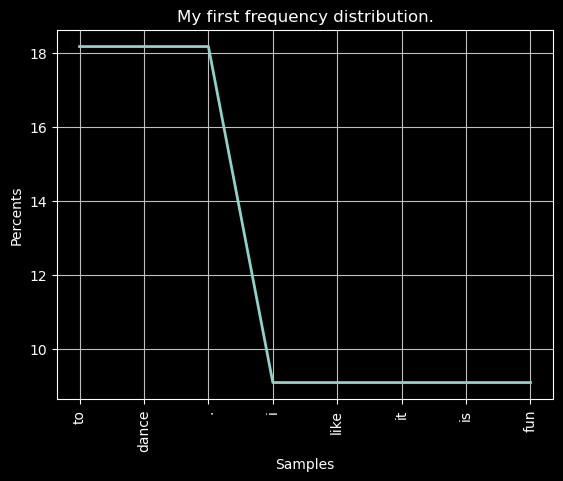

<Axes: title={'center': 'My first frequency distribution.'}, xlabel='Samples', ylabel='Percents'>

In [14]:
# We can plot the data we have in a relatively simple manner, either with or without stopwords. 
import matplotlib.pyplot as plt

fd = nltk.FreqDist(tokens)

# We will feed our plot all '8' words as a parameter for our plot. We also want to set cumulative as 'false'
fd.plot(8,cumulative=False, percents=True, title="My first frequency distribution.")

<h1> Activity 3 </h1>
<h3>Sentiment analysis is another way to contextualise words and their associated meaning. </h3>

We can think of sentiment as either positive or negative, but this is a spectrum. 'Good' is not the same as 'Great.' It's good, but it's not great! I like chocolate but love coffee. If you gave me the choice of either chocolate or coffee, I'd always choose coffee!

Some words perhaps do not have any sentiment at all, e.g. table, cabbage.

We will use a popular library for social media data analysis to quickly calculate some metrics and see how we can turn a word into a quantifiable metric based on some predefined rules.

In [19]:
# example 4 detecting sentiment - the easy way

from nltk.sentiment.vader import SentimentIntensityAnalyzer

# You will also want to load the Lexicon that quantifies polar sentiment (positive/negative)
# Again, with Python, other people have often done the heavy lifting for us!
nltk.download('vader_lexicon')

analyzer=SentimentIntensityAnalyzer()

# Values live on a spectrum. Love is more extremely positive than like for example.
sentence = "I hate sandwiches."

# Try tweaking this sentence with your own words and phrases. 
# Does the order of words matter? Can you find any surprising categorisations of +/- sentiment?

analyzer.polarity_scores(sentence)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\johan\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


{'neg': 0.787, 'neu': 0.213, 'pos': 0.0, 'compound': -0.5719}

<h1> Activity 4 </h1>
<h3> High level visualisations for narrative </h3>
We cover visualisations later, but let's have a look at how we might visualise some given text in a simple way.

This is really helpful in the context of exploratory data analysis to give us a high level overview of words.

I hate sandwiches.


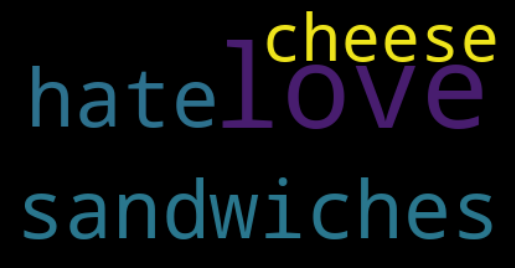

In [22]:
# example 4 final, plotting a word cloud

from wordcloud import WordCloud

sentence = 'I love sandwiches. I hate cheese.'
print(sentence)


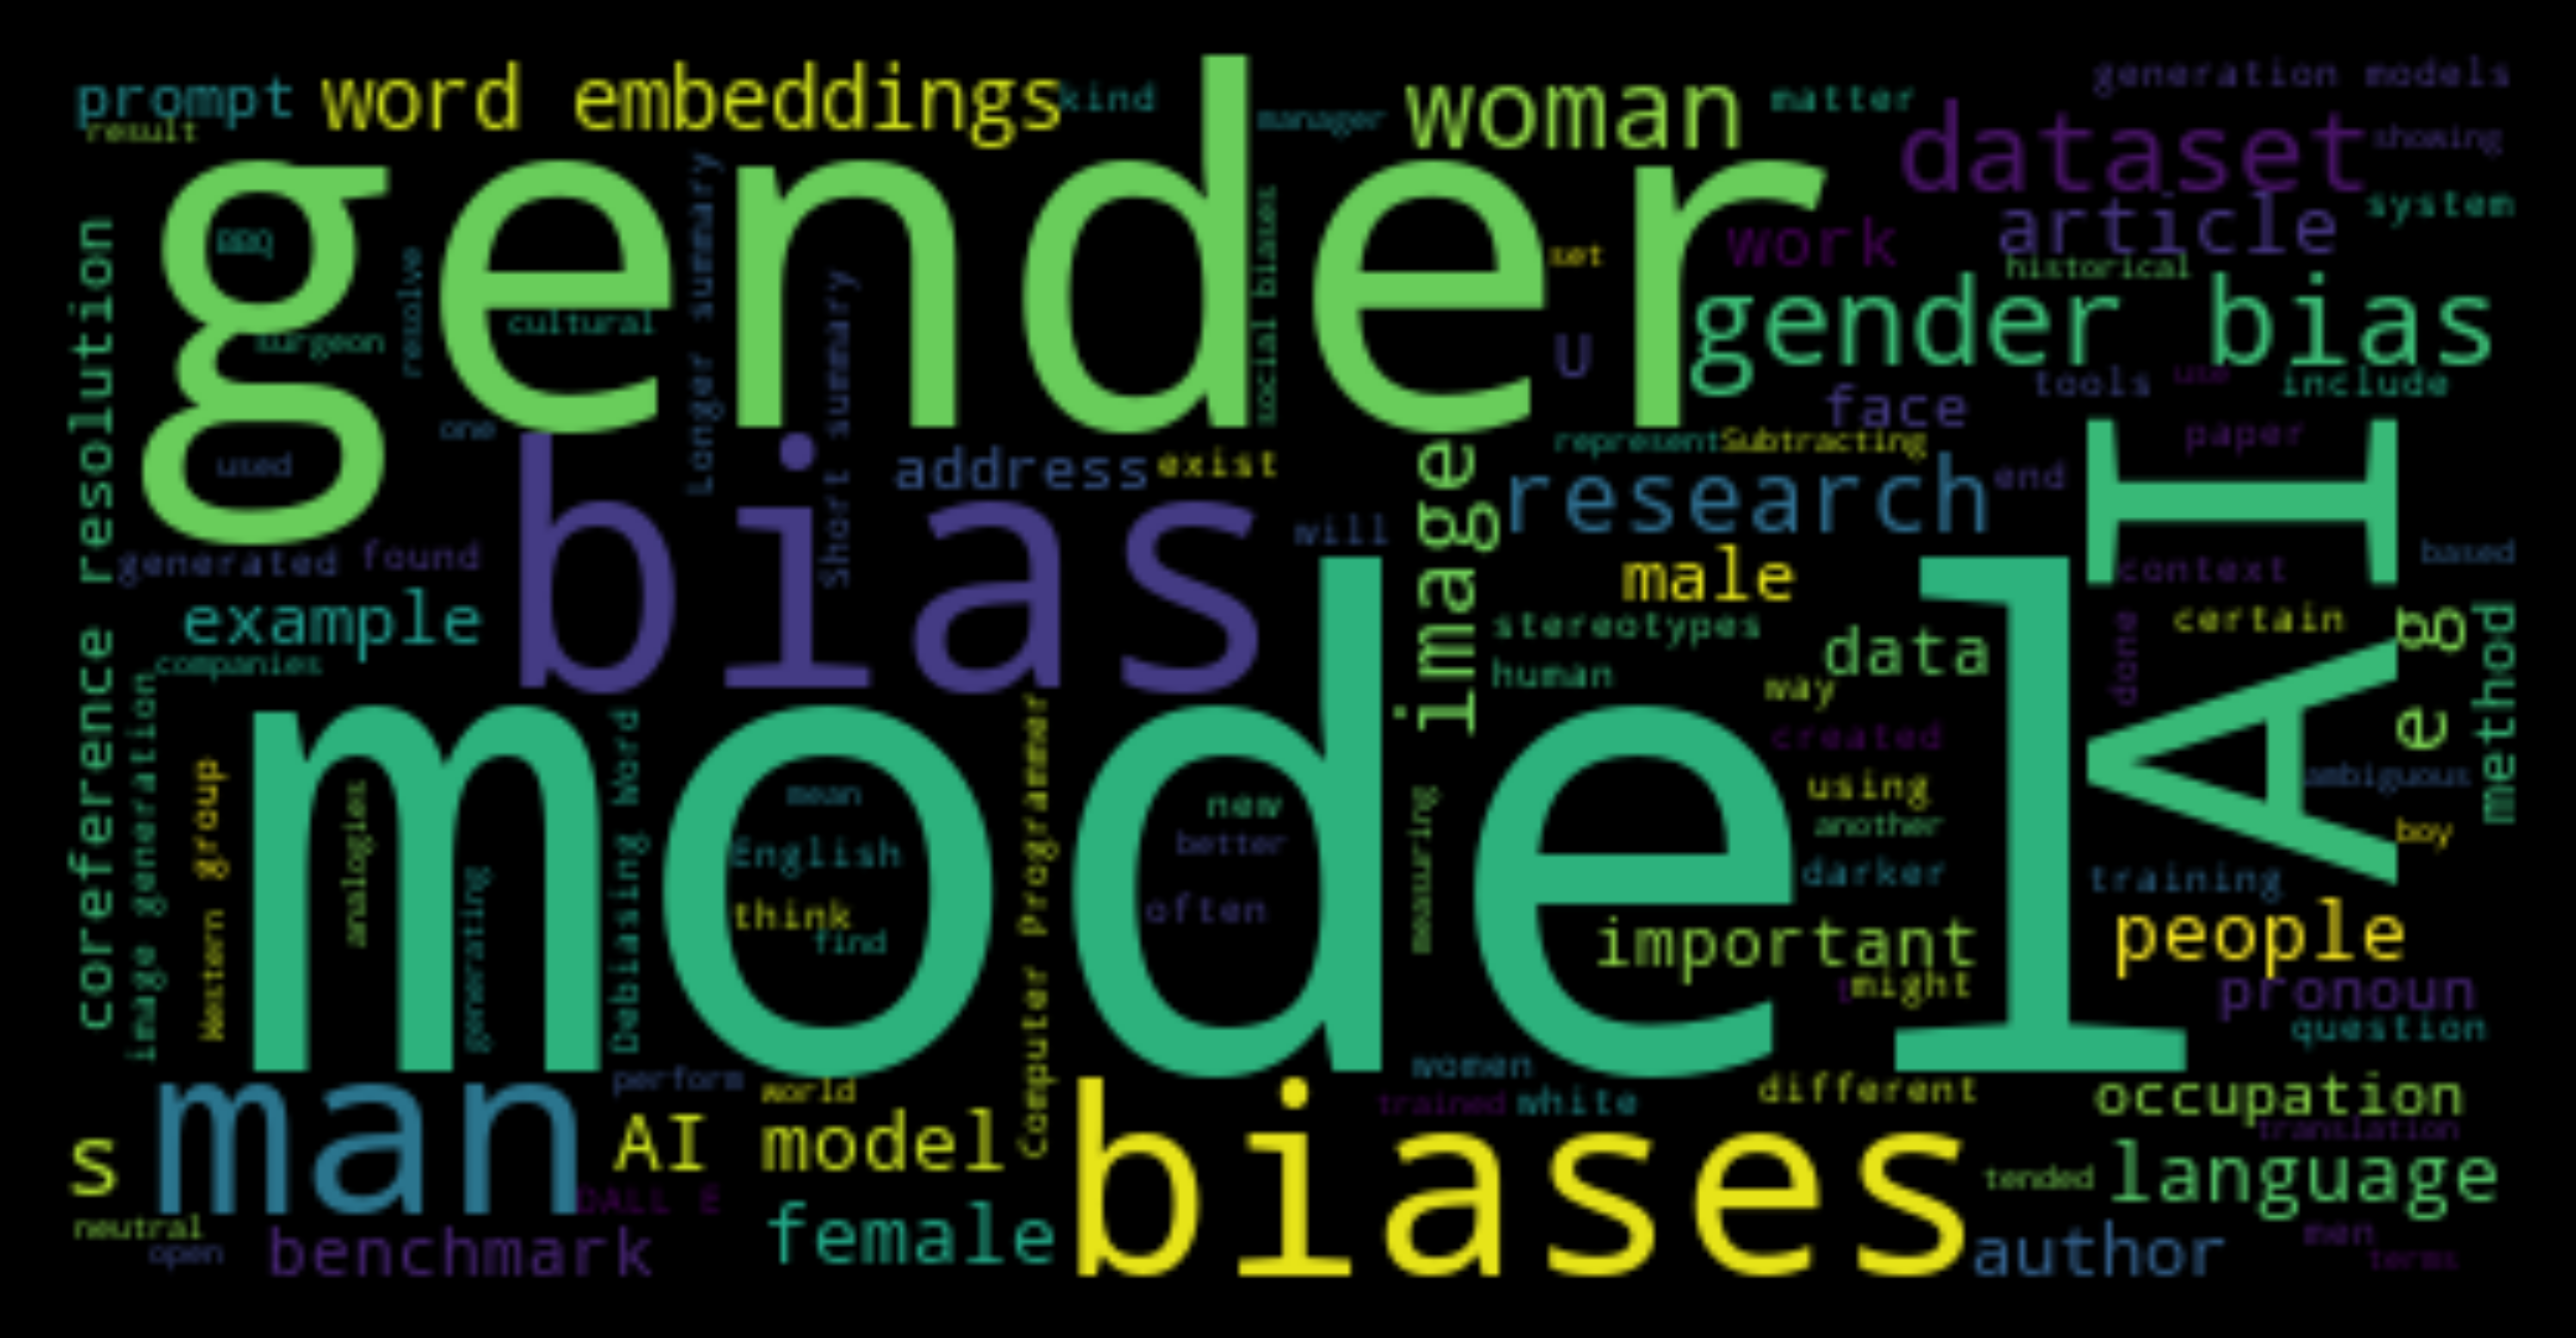

In [29]:

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

plt.figure(dpi=500)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')

# bilinear interpolation is a way to spread the words out without them bumping into one another
plt.axis("off")

plt.show()

# Do you notice some words missing? Did you remove stopwords? Have a go at loading a file in.
# Can you produce a wordcloud of some text that you are interested in analysing?

We've seen some very simple examples of what we can do here. Use this boiletplate code to pick a 'theme' of your own. Find a dataset that contains some words and see if you can work through the data processing pipeline in the same way.

Finally, see if you can share a mini analysis of your own using some or even all of the tools you have learned about.

In [34]:
a = [1,2,3]
a.clear([1,2])
a

TypeError: list.clear() takes no arguments (1 given)

In [39]:
x = {1:2, 3:4}
x

{1: 2, 3: 4}

In [40]:
x.clear()
x

AttributeError: 'dict' object has no attribute 'len'

In [41]:
len(x)

2

In [46]:
5 not in x.keys()

True

In [49]:
%timeit?

Docstring:
Time execution of a Python statement or expression

Usage, in line mode:
  %timeit [-n<N> -r<R> [-t|-c] -q -p<P> -o] statement
or in cell mode:
  %%timeit [-n<N> -r<R> [-t|-c] -q -p<P> -o] setup_code
  code
  code...

Time execution of a Python statement or expression using the timeit
module.  This function can be used both as a line and cell magic:

- In line mode you can time a single-line statement (though multiple
  ones can be chained with using semicolons).

- In cell mode, the statement in the first line is used as setup code
  (executed but not timed) and the body of the cell is timed.  The cell
  body has access to any variables created in the setup code.

Options:
-n<N>: execute the given statement <N> times in a loop. If <N> is not
provided, <N> is determined so as to get sufficient accuracy.

-r<R>: number of repeats <R>, each consisting of <N> loops, and take the
average result.
Default: 7

-t: use time.time to measure the time, which is the default on Unix.
Thi